In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential,Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16

In [2]:
train_datagen=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
train_data=train_datagen.flow_from_directory(directory="CovidDataset/Train",target_size=(224,224),batch_size=1,class_mode="binary")

Found 224 images belonging to 2 classes.


In [3]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [4]:
tesr_datagen=image.ImageDataGenerator(rescale=1/255)
test_data=train_datagen.flow_from_directory(directory="CovidDataset/Val",target_size=(224,224),batch_size=1,class_mode="binary")

Found 60 images belonging to 2 classes.


In [5]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['acc'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [7]:
model.fit_generator(train_data,steps_per_epoch=8,epochs=10,validation_steps=2,validation_data=test_data)

Epoch 1/10


<ipython-input-7-77c799b96814>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=8,epochs=10,validation_steps=2,validation_data=test_data)


8/8 [==============================] - 2s 153ms/step - loss: 1.9268 - acc: 0.5000 - val_loss: 0.7136 - val_acc: 0.5000
Epoch 2/10
8/8 [==============================] - 1s 133ms/step - loss: 0.8264 - acc: 0.7500 - val_loss: 0.6989 - val_acc: 0.5000
Epoch 3/10
8/8 [==============================] - 1s 177ms/step - loss: 0.8180 - acc: 0.2500 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 4/10
8/8 [==============================] - 1s 165ms/step - loss: 0.6938 - acc: 0.2500 - val_loss: 0.6850 - val_acc: 1.0000
Epoch 5/10
8/8 [==============================] - 1s 172ms/step - loss: 0.6980 - acc: 0.3750 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/10
8/8 [==============================] - 1s 175ms/step - loss: 0.6909 - acc: 0.7500 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/10
8/8 [==============================] - 2s 199ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.7000 - val_acc: 0.0000e+00
Epoch 8/10
8/8 [==============================] - 1s 162ms/step - loss: 0.6927 - acc: 0.5000 - va

In [8]:
path='CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg'
img=image.load_img(path,target_size=(224,224))
img=image.img_to_array(img)/255
img=np.array([img])
img.shape

(1, 224, 224, 3)

In [9]:
result=model.predict(img).astype("int32")
result

array([[0]])

In [10]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory="CovidDataset/Train"  , target_size=(224,224))

Found 224 images belonging to 2 classes.


In [11]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= "CovidDataset/Val" , target_size=(224,224), shuffle= False)

Found 60 images belonging to 2 classes.


In [12]:
train.class_indices

{'Covid': 0, 'Normal': 1}

In [13]:
class_type = {0:'Covid',  1 : 'Normal'}

In [14]:
t_img , label = train.next()

In [15]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


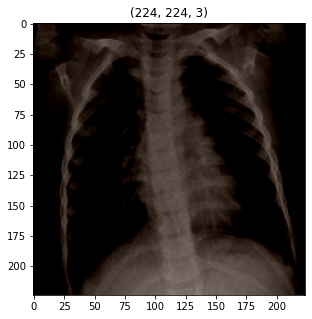

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


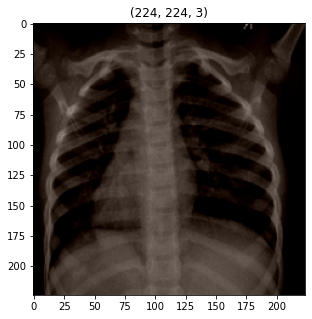

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


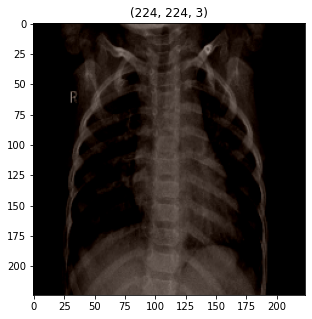

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


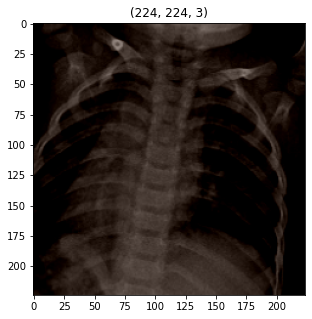

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


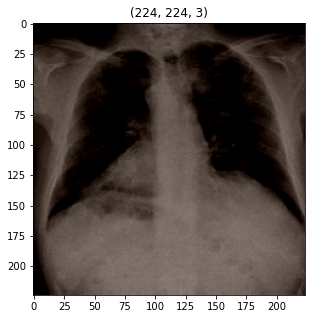

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


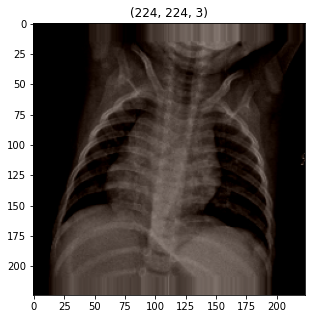

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


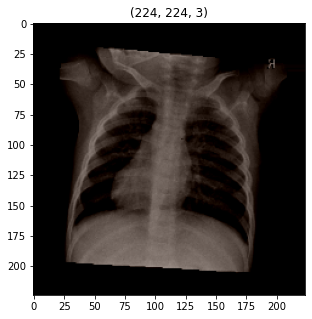

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


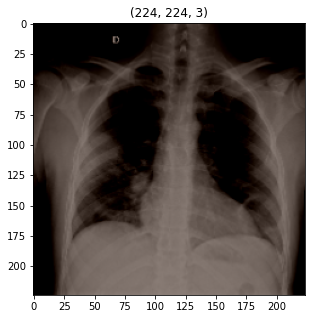

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


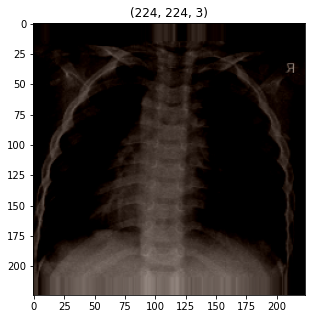

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


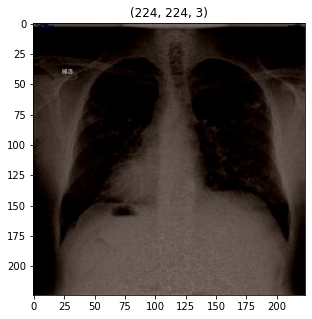

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


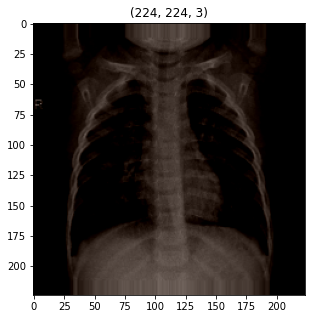

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


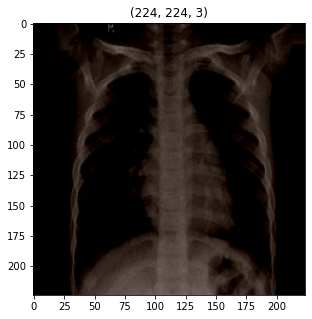

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


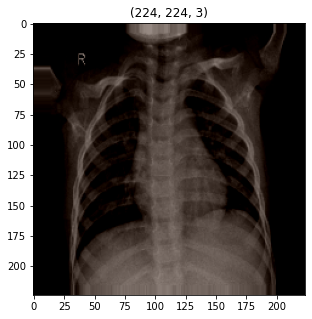

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


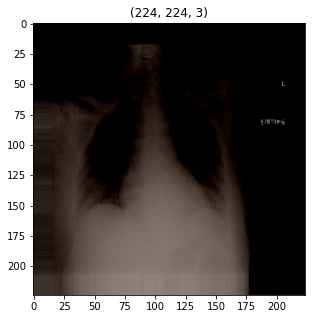

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


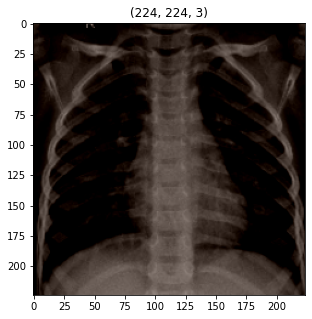

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


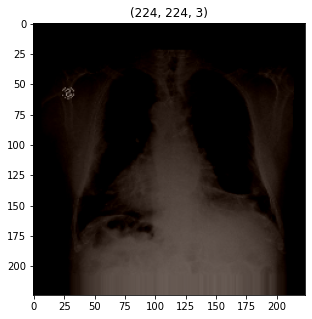

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


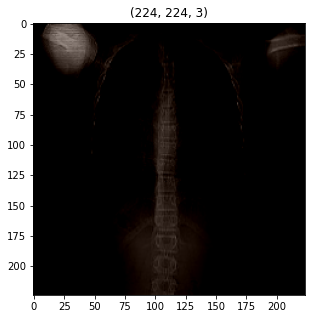

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


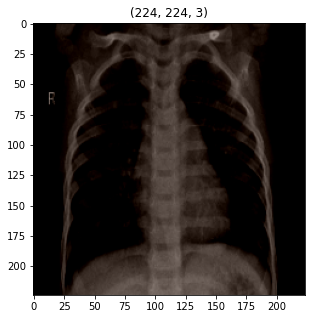

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


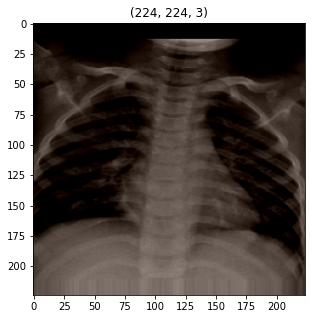

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


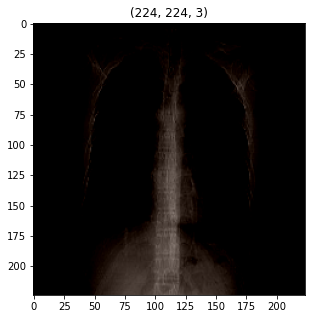

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


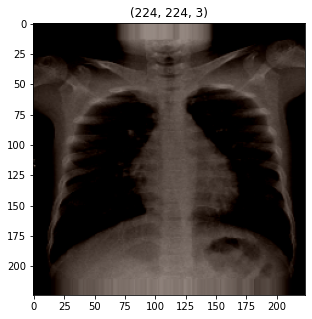

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


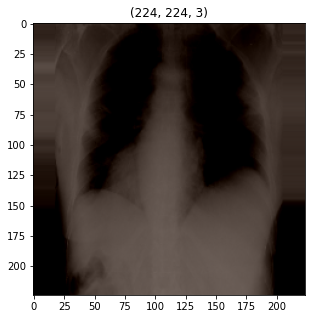

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


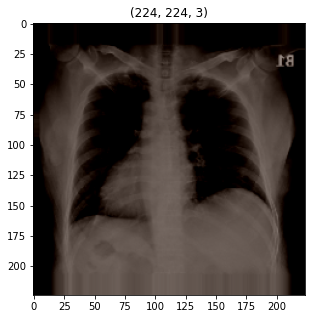

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


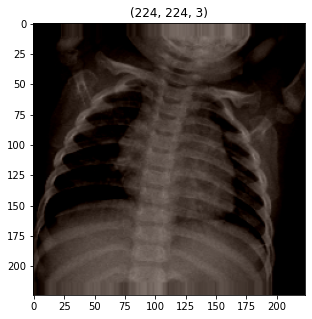

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


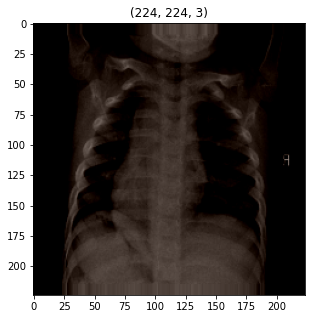

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


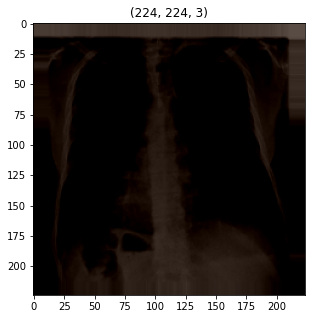

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


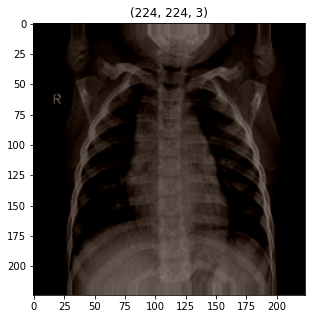

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


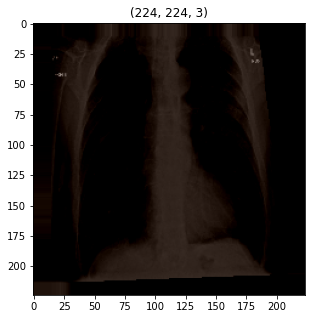

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


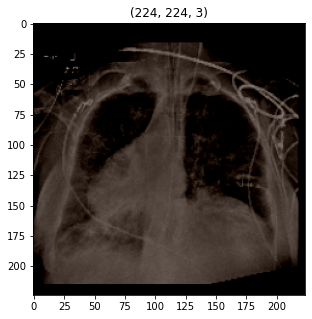

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


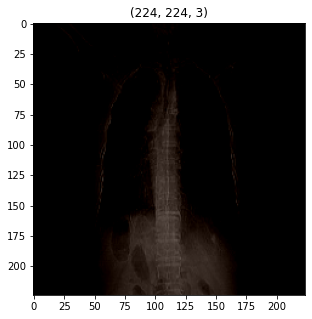

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


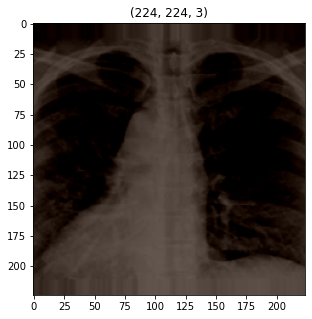

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


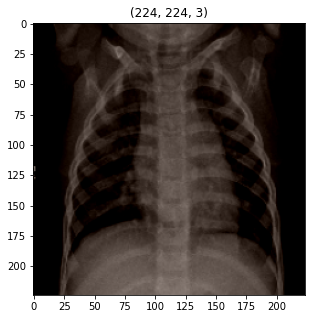

In [16]:
plotImages(t_img, label)

In [17]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [18]:
vgg = VGG16( input_shape=(224,224,3), include_top= False)

In [19]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [20]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [23]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [24]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30,  validation_steps= 32, callbacks=[es,mc])

<ipython-input-24-b8caf4142e0a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30,  validation_steps= 32, callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - 43s 4s/step - loss: 1.0231 - accuracy: 0.6161


In [25]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy'])

In [26]:
acc = model.evaluate_generator(generator= test)[1] 
print(f"The accuracy of your model is = {acc} %")

<ipython-input-26-58b0812dc0b6>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(generator= test)[1]


The accuracy of your model is = 0.949999988079071 %


In [27]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type = Covid

The chances of image being Covid is : 96.89367413520813 percent

The chances of image being Normal is : 41.49160981178284 percent


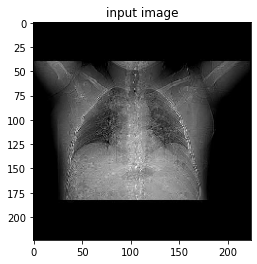

In [28]:
path = "CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg"       # you can add any image path

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

In [29]:
import tensorflow as tf

In [30]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [31]:
import matplotlib.cm as cm
from IPython.display import Image, display

In [32]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded 
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [33]:
def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """
  
  
  
  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing the covid spot")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

The given X-Ray image is of type = Covid

The chances of image being Covid is : 96.89367413520813 %
The chances of image being Normal is : 41.49160981178284 %

image with heatmap representing the covid spot


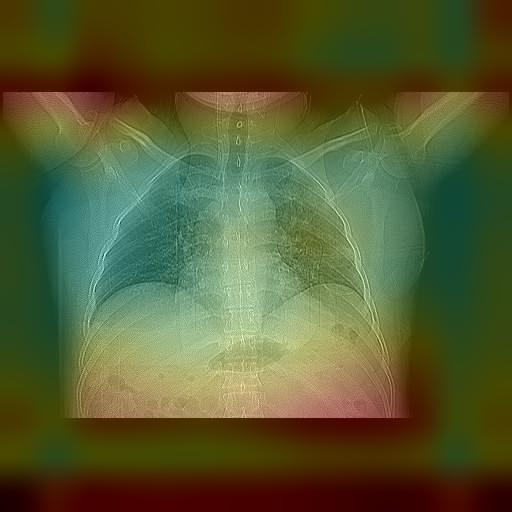


the original input image



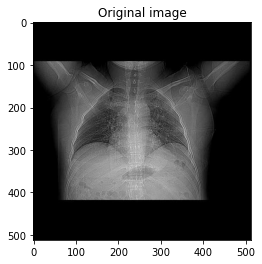

In [34]:
path = "CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg"
image_prediction_and_visualization(path)

The given X-Ray image is of type = Normal

The chances of image being Covid is : 74.98315572738647 %
The chances of image being Normal is : 82.4723482131958 %

image with heatmap representing the covid spot


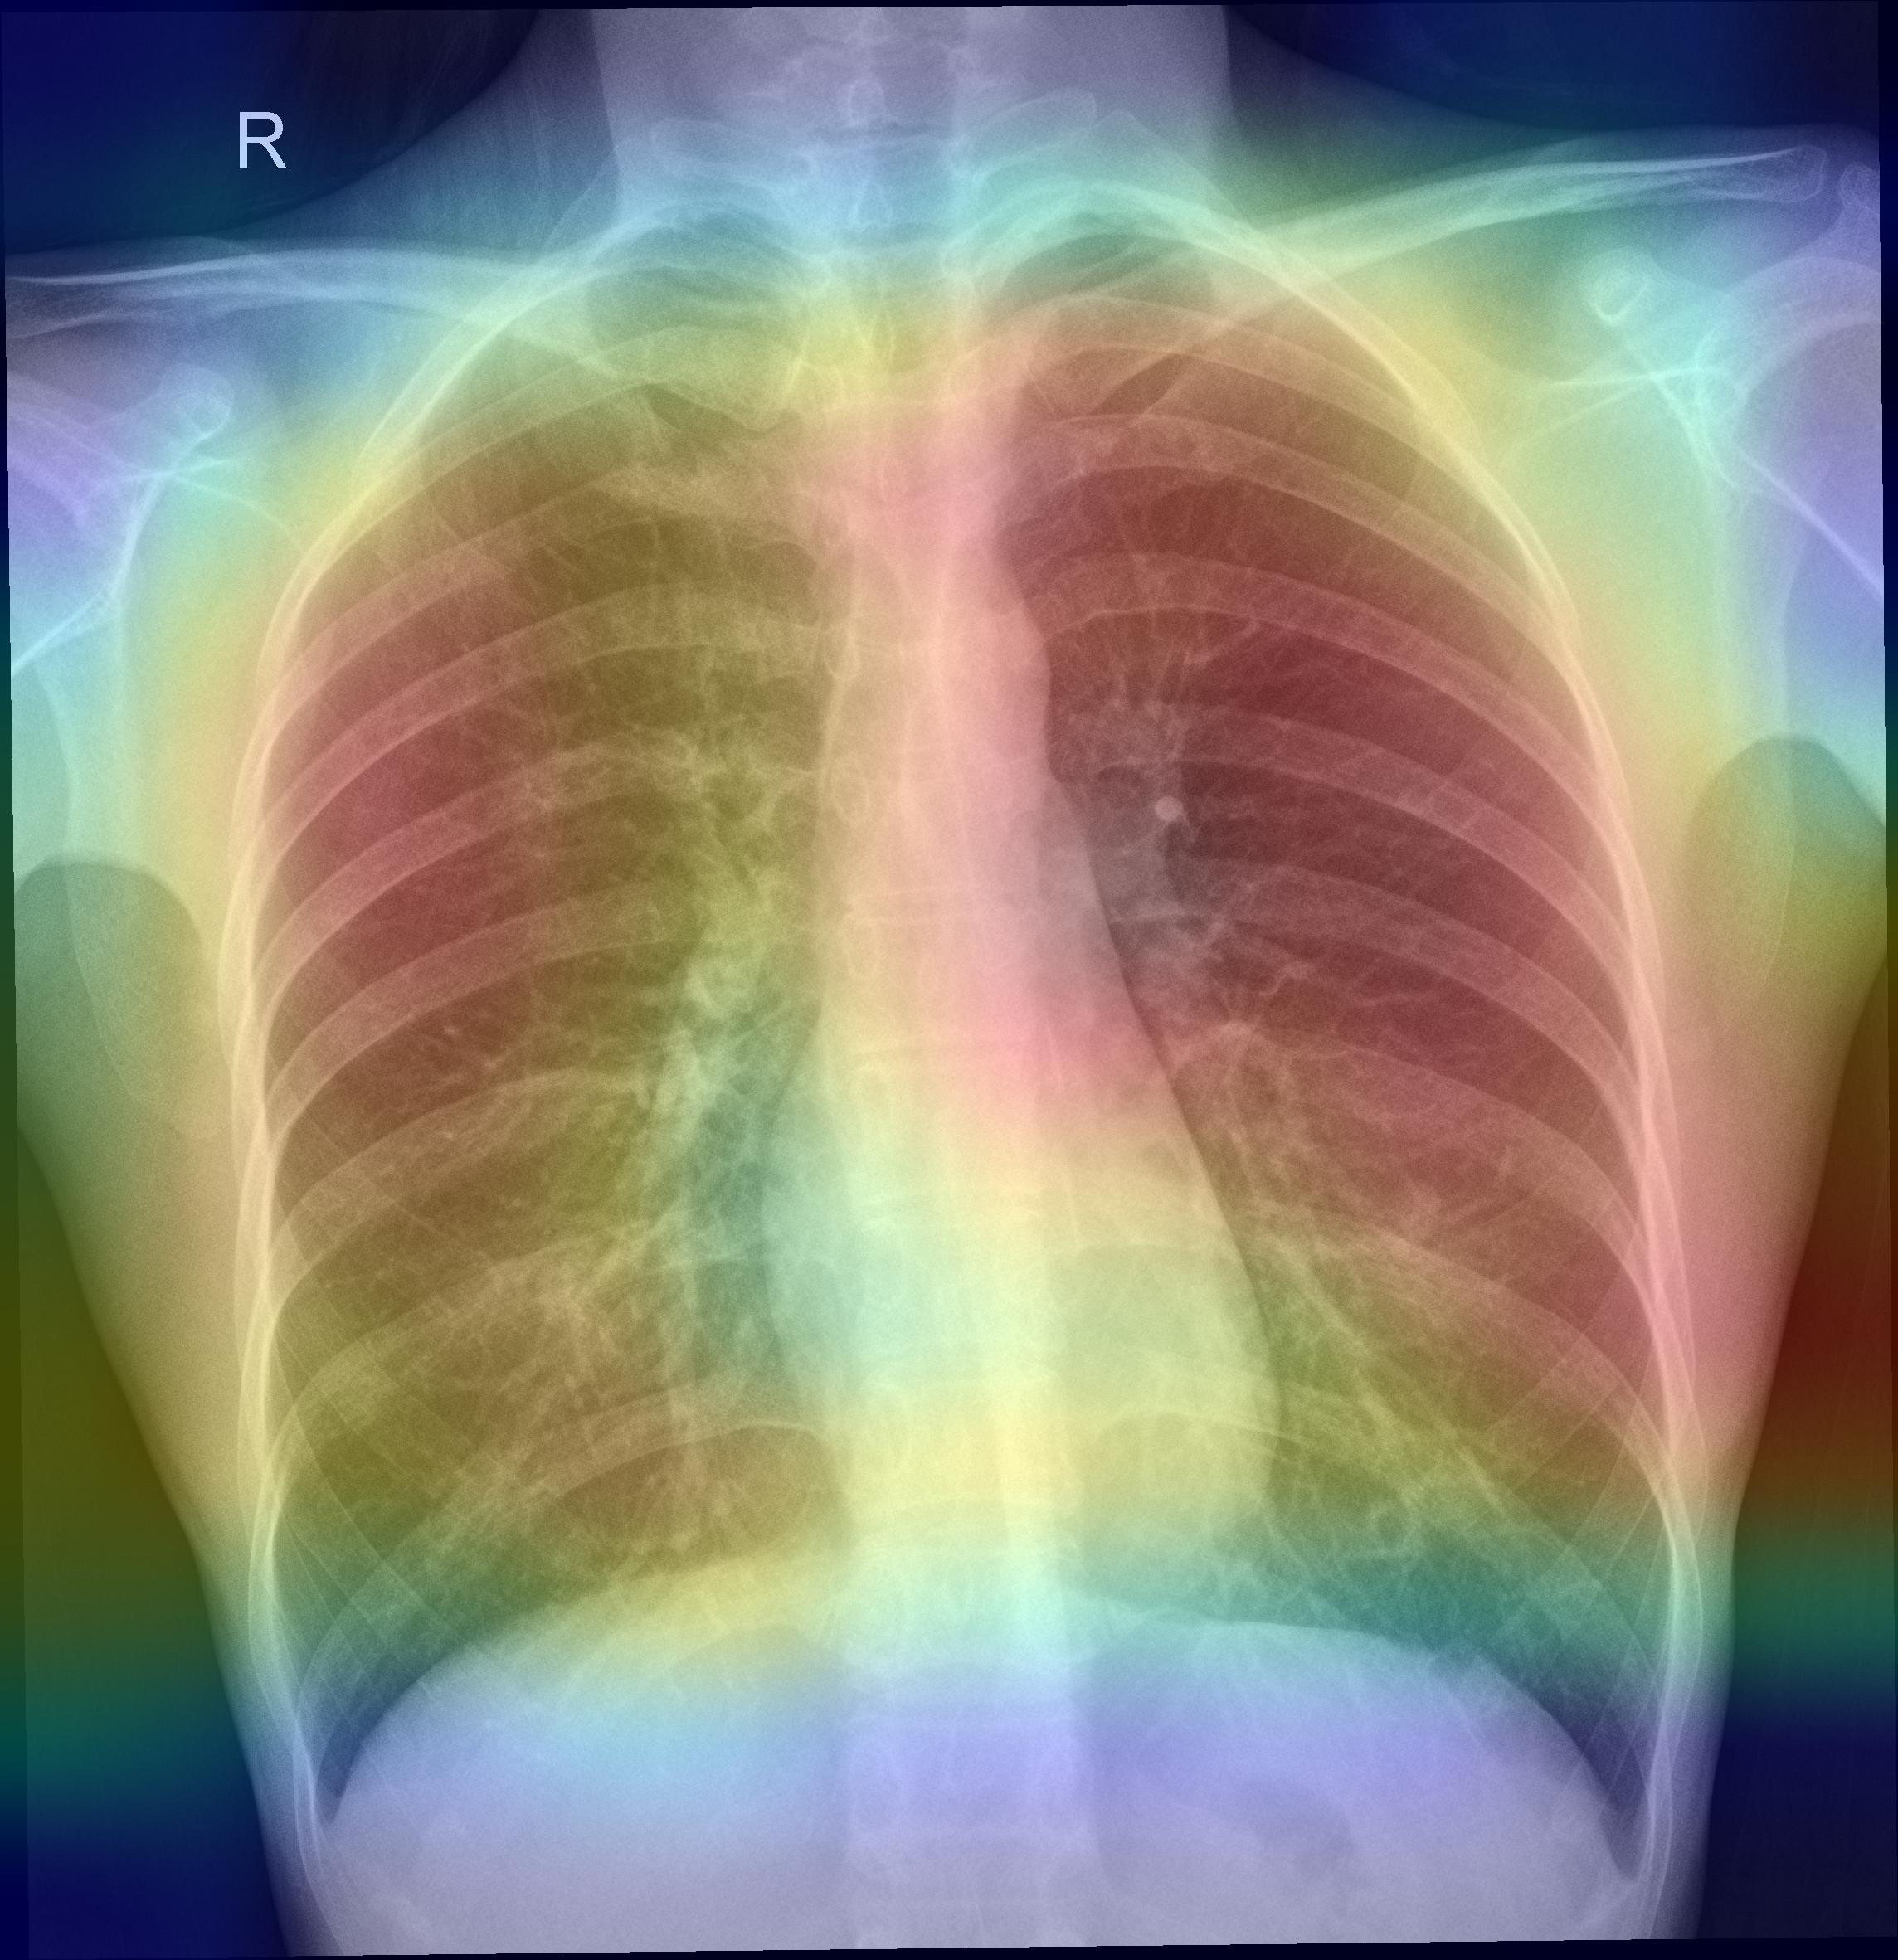


the original input image



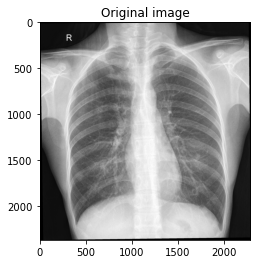

In [35]:
path = "CovidDataset/Val/Normal/NORMAL2-IM-0441-0001.jpeg"
image_prediction_and_visualization(path)